In [22]:
#imports
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import itertools
from matplotlib import pyplot as plt


Altes Modell

Anzahl Items mit denen das Modell trainiert worden ist

7528 Items pro y
15056 Uebungen (unique)
2496 User IDs (unique)

Anzahl Items mit denen das Modell trainiert worden ist pro n

In [ ]:
n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
sentence_len= pd.DataFrame(columns=['Sentence', 'Count'])

for x in n:
    path='../01_prognosemodell/06_newtry/matrices_forte/matrix'+str(x)+'.pkl'
    infile = open(path,'rb')
    get_length = pickle.load(infile)
    infile.close()
    l = len(get_length)
    sentence_len = sentence_len.append({'Sentence': x, 'Count':l}, ignore_index=True)

<AxesSubplot:xlabel='Sentence', ylabel='Count'>

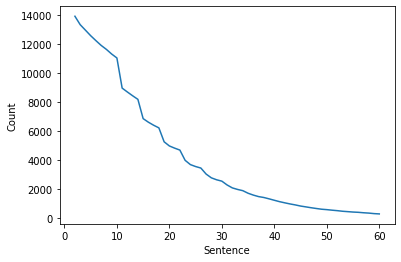

In [24]:
sentence_len['Sentence']=sentence_len['Sentence'].astype('int')
sentence_len['Count']=sentence_len['Count'].astype('int')
sns.lineplot(data=sentence_len, x="Sentence", y="Count")

Anzahl User pro Subgruppe

In [25]:
infile = open('fairness_ready.pkl','rb')
df = pickle.load(infile)
infile.close()

#Abi eltern
df.AbiEltern = df.AbiEltern.astype('float')
df_abi = df[df.AbiEltern > 0]
df_keinAbi = df[df.AbiEltern ==0]
df_weissnicht = df[df.AbiEltern.isnull()]
#Gender
df_boys = df[df.Sex__m == 1]
df_girls = df[df.Sex__w == 1]
# Migration
df_deutsch = df[df.eigSprache == 1]
df_migration = df[df.eigSprache == 0]
# Anzahl Bücher
df['Buecher'] = df['Buecher'].replace(['10'],0)
df['Buecher'] = df['Buecher'].replace(['200'],1)
df_buch0 = df[df.Buecher == 0.0]
df_buch1 = df[df.Buecher == 1]

In [ ]:
group = ['abiEltern', 'abiEltern', 'gender', 'gender', 'erstsprache', 'erstsprache', 'buecher', 'buecher']
subgroup = ['abi', 'keinAbi', 'boys', 'girls', 'deutsch', 'migration', 'buch0', 'buch1']
df_name = [df_abi, df_keinAbi, df_boys, df_girls, df_deutsch, df_migration, df_buch0, df_buch1]
sentence_len= pd.DataFrame(columns=['Sentence', 'Count','group','subgroup'])
matrice = ['matrices_forte_abi', 'matrices_forte_keinAbi','matrices_forte_boys','matrices_forte_girls', 'matrices_forte_deutsch', 'matrices_forte_migration', 'matrices_buecher_0', 'matrices_buecher_1']

for (df_name, group, subgroup, matrice) in zip(df_name, group, subgroup, matrice):
    n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]

    for x in n:
        path='../01_prognosemodell/06_newtry/'+matrice+'/matrix'+str(x)+'.pkl'
        infile = open(path,'rb')
        get_length = pickle.load(infile)
        l = len(get_length)
        sentence_len = sentence_len.append({'Sentence': x, 'Count':l,'group':group,'subgroup':subgroup}, ignore_index=True)

    sentence_len['Sentence']=sentence_len['Sentence'].astype('int')
    sentence_len['Count']=sentence_len['Count'].astype('int')

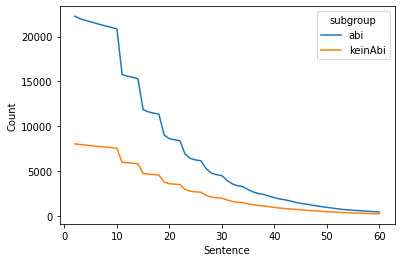

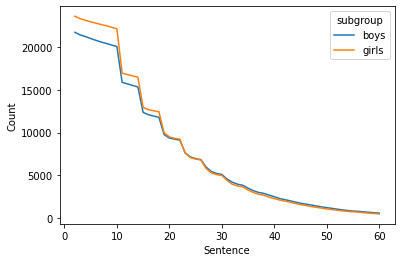

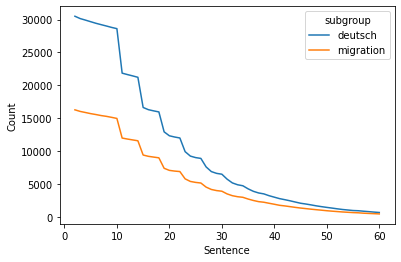

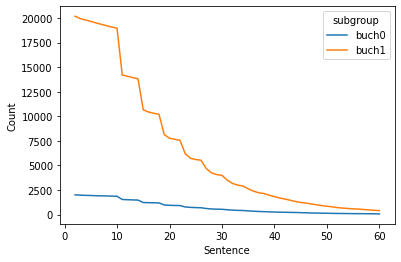

In [27]:
group = ['abiEltern', 'gender', 'erstsprache', 'buecher']

for x in group:
    df = sentence_len[sentence_len.group ==x]
    sns.lineplot(data=df, x="Sentence", y="Count", hue='subgroup')
    plt.show()

Anzahl User pro Subgruppe

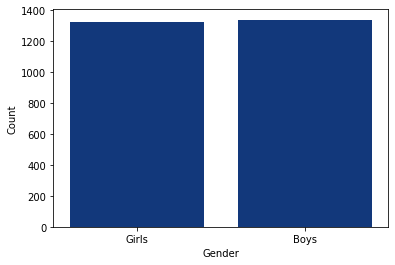

In [28]:
data = {'Count':  [1325, 1339],
        'Gender': ['Girls', 'Boys']
        }

df = pd.DataFrame (data, columns = ['Count','Gender'])

ax = sns.barplot(data=df, y='Count', x='Gender', color='#00338d')

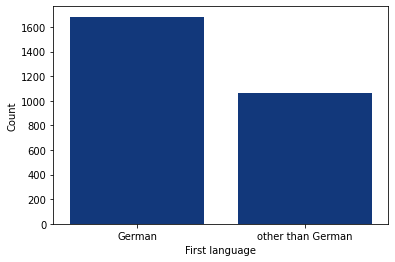

In [29]:
data = {'Count':  [1683, 1066],
        'First language': ['German','other than German']
        }

df = pd.DataFrame (data, columns = ['Count','First language'])

ax = sns.barplot(data=df, y='Count', x='First language', color='#00338d')

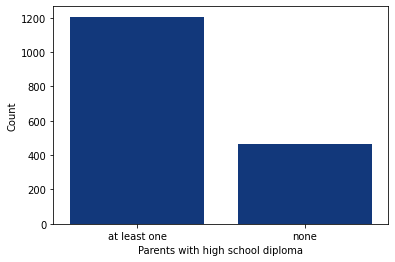

In [30]:
data = {'Count':  [1206,464],
        'Parents with high school diploma': ['at least one','none']
        }

df = pd.DataFrame (data, columns = ['Count','Parents with high school diploma'])

ax = sns.barplot(data=df, y='Count', x='Parents with high school diploma', color='#00338d')

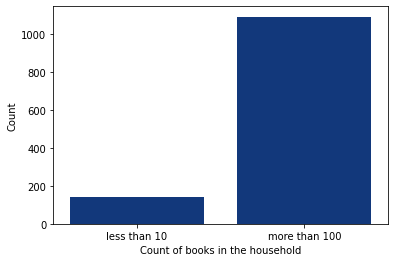

In [31]:
data = {'Count':  [142,1092],
        'Count of books in the household': ['less than 10', 'more than 100']
        }

df = pd.DataFrame (data, columns = ['Count','Count of books in the household'])

ax = sns.barplot(data=df, y='Count', x='Count of books in the household', color='#00338d')

Neues Modell

Anzahl Items mit denen das Modell trainiert worden ist

In [32]:
infile = open('../04_predictionUserHistory/01_data/FINALsmallSampleSet_3months_without_duplicates.pkl','rb')
import_file = pickle.load(infile)
infile.close()

print(import_file.shape)

(199825, 1078)


Anzahl User Pro Subgruppe

In [33]:
infile = open('preprocessed_umfrage.pkl','rb')
df = pickle.load(infile)
infile.close()

################### SUBGROUPING

# Abi eltern
df.AbiEltern = df.AbiEltern.astype('float')
df_abi = df[df.AbiEltern > 0]
df_keinAbi = df[df.AbiEltern ==0]
df_weissnicht = df[df.AbiEltern.isnull()]

print(len(df_abi.UserID.unique()))
print(len(df_keinAbi.UserID.unique()))
print(len(df_weissnicht.UserID.unique()))

#Gender
df_boys = df[df.Sex__m == 1]
df_girls = df[df.Sex__w == 1]
print(len(df_boys.UserID.unique()))
print(len(df_girls.UserID.unique()))

# Migration
df_deutsch = df[df.eigSprache == 1]
df_migration = df[df.eigSprache == 0]

print(len(df_deutsch.UserID.unique()))
print(len(df_migration.UserID.unique()))

# Anzahl Bücher
df['Buecher'] = df['Buecher'].replace(['10'],0)
df['Buecher'] = df['Buecher'].replace(['200'],1)
df_buch0 = df[df.Buecher == 0.0]
df_buch1 = df[df.Buecher == 1]

print(len(df_buch0.UserID.unique()))
print(len(df_buch1.UserID.unique()))

   

1556
641
1471
1760
1800
2163
1505
230
535


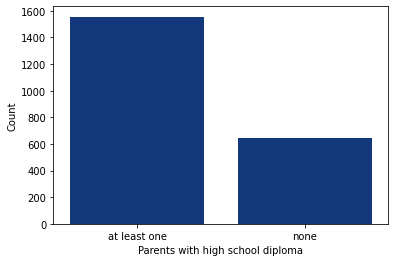

In [34]:
data = {'Count':  [1556,641],
        'Parents with high school diploma': ['at least one','none']
        }

df = pd.DataFrame (data, columns = ['Count','Parents with high school diploma'])

ax = sns.barplot(data=df, y='Count', x='Parents with high school diploma', color='#00338d')

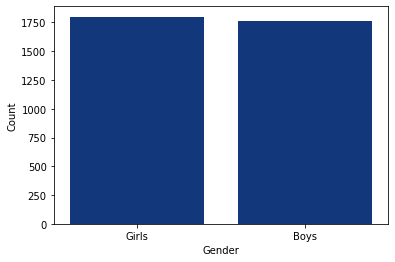

In [35]:
data = {'Count':  [1800, 1760],
        'Gender': ['Girls', 'Boys']
        }

df = pd.DataFrame (data, columns = ['Count','Gender'])

ax = sns.barplot(data=df, y='Count', x='Gender', color='#00338d')

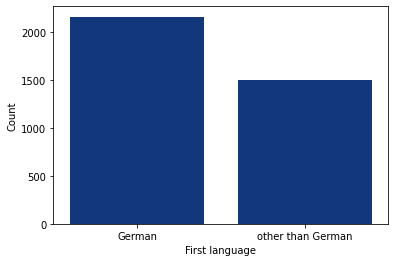

In [36]:
data = {'Count':  [2163, 1505],
        'First language': ['German','other than German']
        }

df = pd.DataFrame (data, columns = ['Count','First language'])

ax = sns.barplot(data=df, y='Count', x='First language', color='#00338d')

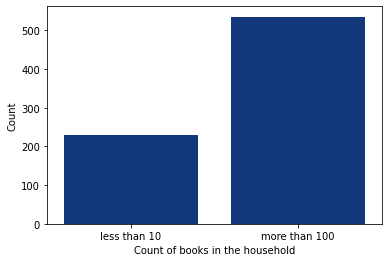

In [37]:
data = {'Count':  [230,535],
        'Count of books in the household': ['less than 10', 'more than 100']
        }

df = pd.DataFrame (data, columns = ['Count','Count of books in the household'])

ax = sns.barplot(data=df, y='Count', x='Count of books in the household', color='#00338d')